### CUSTOMER SEGMENTATION: CLUSTERING 

In [25]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import kelbow_visualizer

sns.set_style('dark')
sns.set_palette('husl')

In [11]:
# bringing in the dataset

data = pd.read_csv('customers.csv')

In [12]:
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [13]:
data.rename(columns= {'Annual Income (k$)':'income',
                      'Spending Score (1-100)':'spending score'}, inplace=True)

data.drop(columns=['CustomerID'], inplace=True)

In [14]:
data.isnull().sum()

Gender            0
Age               0
income            0
spending score    0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   income          200 non-null    int64 
 3   spending score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [16]:
# converting income column back to thousands 

data['income'] = [x *1000 for x in data['income']]



#### Data Visualization

In [17]:
data.columns

Index(['Gender', 'Age', 'income', 'spending score'], dtype='object')

In [18]:
data.describe()

,Age,income,spending score
count,200.000000,200.000000,200.000000
mean,38.850000,60560.000000,50.200000
std,13.969007,26264.721165,25.823522
min,18.000000,15000.000000,1.000000
25%,28.750000,41500.000000,34.750000
50%,36.000000,61500.000000,50.000000
75%,49.000000,78000.000000,73.000000
max,70.000000,137000.000000,99.000000


Text(0.5, 0.98, 'DISTRIBUTION OF GENDER AND AGE GROUP')

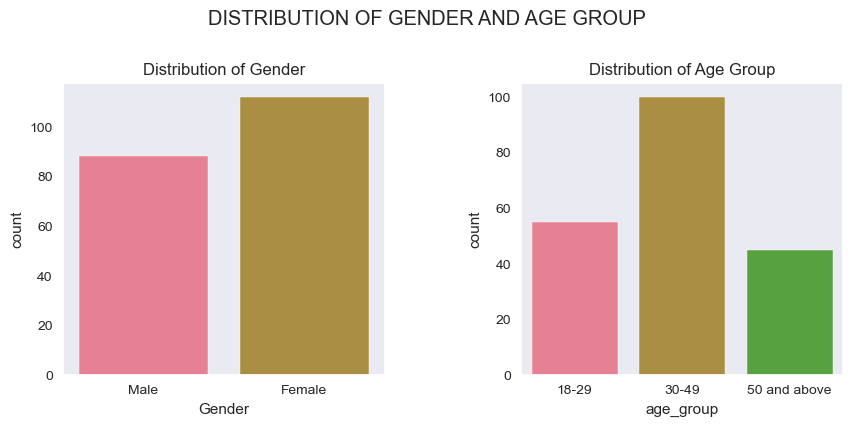

In [26]:
# distribution of income, spending score across gender.
# create an age group column
data['age_group'] = ['18-29' if x < 30 else '30-49' if x < 50
                     else '50 and above' for x in data['Age']]

fig, axes = plt.subplots(1,2, figsize = (10, 5)) 
sns.countplot(data=data, x = 'Gender', ax= axes[0])
sns.countplot(data=data, x = 'age_group', ax= axes[1])

plt.tight_layout(pad= 5)
axes[0].set_title('Distribution of Gender')
axes[1].set_title('Distribution of Age Group')
plt.suptitle('DISTRIBUTION OF GENDER AND AGE GROUP')

Text(0.5, 0.98, 'DISTRIBUTION OF CONTINUOUS VARIABLES')

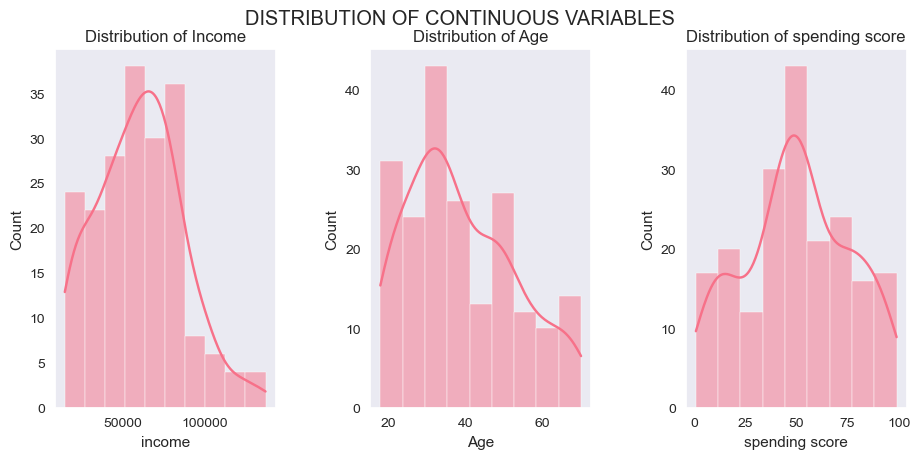

In [29]:
# distribution of all the continuous variables 

fig, axes = plt.subplots(1,3, figsize = (10, 5)) 
sns.histplot(data=data, x = 'income', kde=True, ax= axes[0])
sns.histplot(data=data, x = 'Age',kde=True, ax= axes[1])
sns.histplot(data=data, x = 'spending score', kde=True, ax= axes[2])

plt.tight_layout(pad= 3)
axes[0].set_title('Distribution of Income')
axes[1].set_title('Distribution of Age')
axes[2].set_title('Distribution of spending score')
plt.suptitle('DISTRIBUTION OF CONTINUOUS VARIABLES')

Text(0.5, 0.98, 'DISTRIBUTION OF SPENDING SCORE AND INCOME AGAINST GENDER AND AGE GROUP')

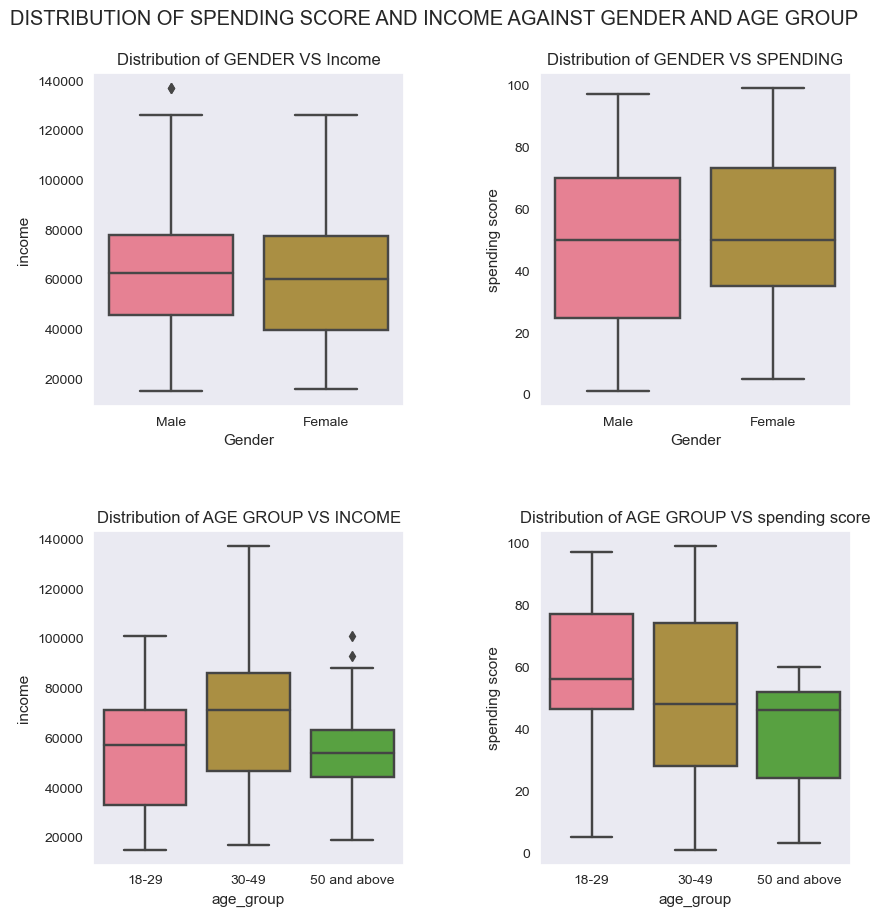

In [34]:
fig, axes = plt.subplots(2,2, figsize = (10, 10)) 
sns.boxplot(data=data, x = 'Gender', y='income', ax= axes[0,0])
sns.boxplot(data=data, x = 'Gender', y = 'spending score', ax= axes[0,1])
sns.boxplot(data=data, x = 'age_group', y='income', ax= axes[1,0])
sns.boxplot(data=data, x = 'age_group', y = 'spending score', ax= axes[1,1])

plt.tight_layout(pad= 5)
axes[0,0].set_title('Distribution of GENDER VS Income')
axes[0,1].set_title('Distribution of GENDER VS SPENDING')
axes[1,0].set_title('Distribution of AGE GROUP VS INCOME')
axes[1,1].set_title('Distribution of AGE GROUP VS spending score')

plt.suptitle('DISTRIBUTION OF SPENDING SCORE AND INCOME AGAINST GENDER AND AGE GROUP')

Text(0.5, 0.98, 'SPENDING SCORE VS INCOME')

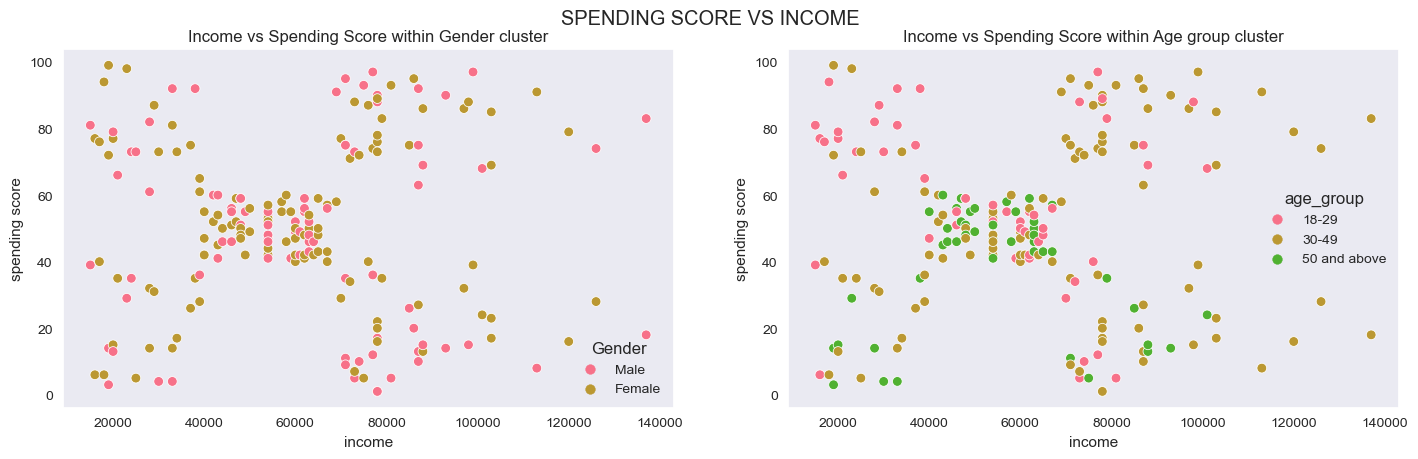

In [39]:
# distribution of income, spending score across gender.
# create an age group column
fig, axes = plt.subplots(1,2, figsize = (15, 5)) 
sns.scatterplot(data=data, x = 'income',y='spending score',hue='Gender', ax= axes[0])
sns.scatterplot(data=data, x = 'income',y='spending score',hue='age_group', ax= axes[1])

plt.tight_layout(pad= 3)
axes[0].set_title('Income vs Spending Score within Gender cluster')
axes[1].set_title('Income vs Spending Score within Age group cluster')
plt.suptitle('SPENDING SCORE VS INCOME')

#### Model BUilding and Evaluation

In [40]:
# label encode gender column

data['Gender'] = [0 if x.lower() == 'male' else 1
                  for x in data['Gender']]

In [42]:
data.drop(columns=['age_group'], inplace= True)

scaler = StandardScaler()

scaled_num = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_num, columns=data.columns)

In [43]:
scaled_df.head(3)

,Gender,Age,income,spending score
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913


In [44]:
# training a kmeans model

clusters = list(range(2,15))
inertia = []

for cluster in clusters:
    model = KMeans(n_clusters=cluster, n_init= 10)
    model.fit(data)
    #preds = model.predict(data)
    inertia.append(model.inertia_)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

Text(0.5, 0.98, 'ELBOW CURVE OF THE BEST K')

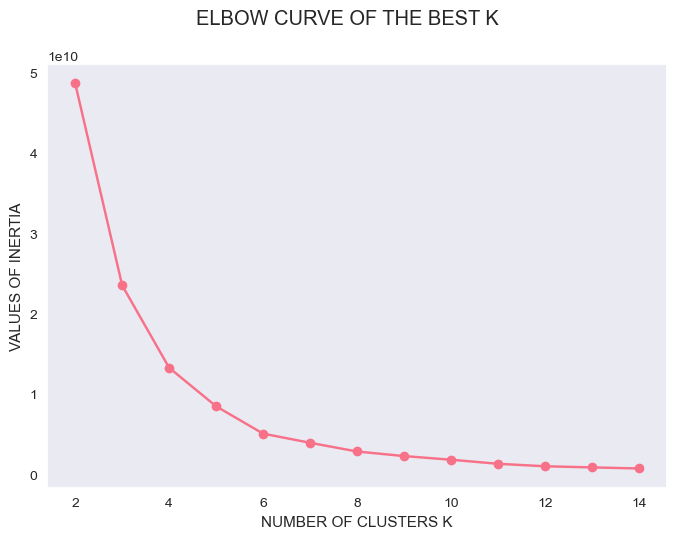

In [46]:
plt.plot(clusters, inertia, '-o')
plt.xlabel('NUMBER OF CLUSTERS K')
plt.ylabel('VALUES OF INERTIA')

plt.suptitle('ELBOW CURVE OF THE BEST K')

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

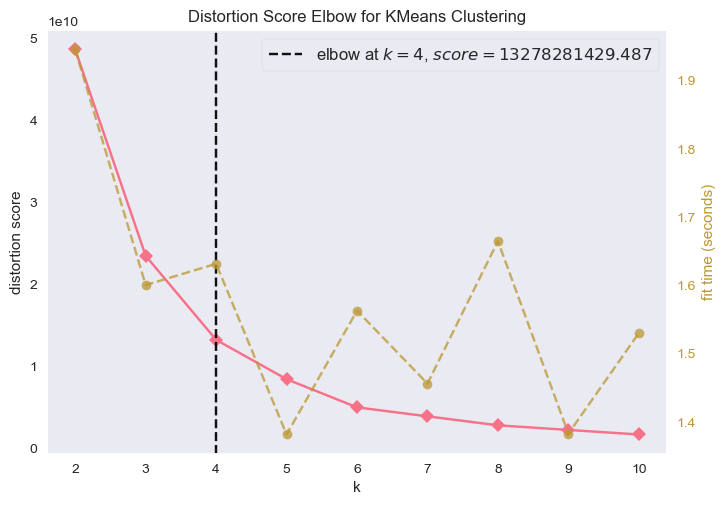

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10))

In [48]:
kelbow_visualizer(model=KMeans(),X= data)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: xlabel='income', ylabel='spending score'>

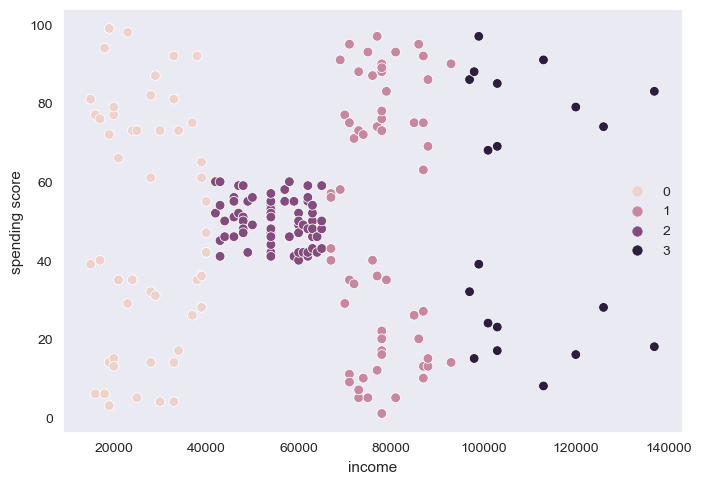

In [50]:
model = KMeans(n_clusters=4, n_init= 10)
model.fit(data)
preds = model.predict(data)

sns.scatterplot(data=data, x = 'income', y='spending score', hue = preds)